<center><h1>Subramanyam_Shruti_HW7</h1></center>
<br>
<br>

<h4>Name: Shruti Subramanyam</h4>
<h4>Github Username: Shruti-Subramanyam</h4>

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, hamming_loss
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from imblearn.over_sampling import SMOTE
from collections import Counter

### (a) Download the Anuran Calls (MFCCs) Data Set

In [2]:
df = pd.read_csv("../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv")

In [3]:
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


### (b) Train a classifier for each label

In [4]:
X = df.iloc[:,:22]
y = df[['Family','Genus','Species']]

In [5]:
X

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.145668,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.164675,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.150025,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.153120,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895


In [6]:
y

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraAndre
1,Leptodactylidae,Adenomera,AdenomeraAndre
2,Leptodactylidae,Adenomera,AdenomeraAndre
3,Leptodactylidae,Adenomera,AdenomeraAndre
4,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
7190,Hylidae,Scinax,ScinaxRuber
7191,Hylidae,Scinax,ScinaxRuber
7192,Hylidae,Scinax,ScinaxRuber
7193,Hylidae,Scinax,ScinaxRuber


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
X_train

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
2004,1.000000,0.327476,0.282440,0.572211,0.096509,-0.036705,-0.082174,0.146604,0.297338,-0.120902,...,0.438532,-0.148451,-0.260375,0.178628,0.218024,-0.042083,-0.126511,-0.090279,0.096176,0.191697
1194,1.000000,0.232818,-0.144331,-0.078909,-0.072467,0.255380,0.450215,0.261033,-0.168462,-0.281445,...,-0.108483,0.329984,0.274031,-0.157579,-0.291979,-0.042932,-0.009021,-0.032679,0.023912,0.041407
5359,0.966443,0.455914,1.000000,0.541650,-0.412873,0.307099,0.235819,-0.064025,0.069728,-0.052552,...,-0.073050,-0.140994,0.162584,-0.007981,-0.049428,-0.053166,-0.026728,0.029443,0.019032,-0.105221
1756,1.000000,0.257873,0.112807,0.527614,0.186094,0.043683,-0.163682,-0.014125,0.196527,0.018839,...,0.404813,-0.075488,-0.320882,0.024806,0.226971,0.034969,-0.106029,-0.147124,0.042627,0.250249
497,1.000000,0.401859,0.563219,0.578304,-0.126517,-0.058725,0.431806,0.066801,-0.321014,0.155569,...,-0.132244,0.190753,0.126674,-0.148049,-0.002891,0.157072,-0.015251,-0.055428,0.086927,0.086006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.000000,0.406366,0.268684,0.704863,0.358415,0.055376,-0.159812,0.065813,0.345068,0.175460,...,0.378497,-0.014091,-0.352985,0.015183,0.220504,0.054246,-0.069108,-0.174583,-0.032202,0.188263
5191,1.000000,0.634337,0.594395,0.403271,0.004960,0.037880,-0.065399,0.125276,0.106976,-0.223357,...,-0.228140,-0.274889,0.244973,0.096130,-0.140923,0.003646,0.007163,0.068718,0.047640,-0.179215
5226,1.000000,0.756413,0.732319,0.385807,-0.034821,0.073881,-0.058027,0.183775,0.219419,-0.445112,...,-0.177708,-0.311815,0.182382,0.030100,-0.182019,0.006296,-0.005868,0.029439,0.004783,-0.198014
5390,0.931410,0.626137,1.000000,0.375834,-0.223044,0.325943,0.121659,-0.092542,0.163365,-0.049382,...,-0.047610,-0.188463,0.102240,0.150353,-0.054750,-0.054434,0.108092,0.156994,-0.051681,-0.085656


In [9]:
y_train

,Family,Genus,Species
2004,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1194,Dendrobatidae,Ameerega,Ameeregatrivittata
5359,Hylidae,Hypsiboas,HypsiboasCinerascens
1756,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
497,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
3772,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
5191,Hylidae,Hypsiboas,HypsiboasCinerascens
5226,Hylidae,Hypsiboas,HypsiboasCinerascens
5390,Hylidae,Hypsiboas,HypsiboasCinerascens


#### (i) Research

#### Solution: 
#### 1.Exact Match Ratio: It is a broader concept of accuracy (single lable classification). In this scenario, it only accepts values if all of the labels' true values are the same as predicted values.

#### 2.Hamming Loss: Hamming Loss computes the proportion of incorrectly predicted labels to the total number of labels.

Reference:

[1] https://towardsdatascience.com/evaluating-multi-label-classifiers-a31be83da6ea

[2] https://medium.com/@KrishnaRaj_Parthasarathy/ml-classification-why-accuracy-is-not-a-best-measure-for-assessing-ceeb964ae47c

In [10]:
def exact_match(y_true, y_pred):
    exact_match_count = 0
    n = len(y_true)
    for i,j in zip(y_true, y_pred):
        if i == j:
            exact_match_count += 1
    return exact_match_count/n

#### (ii) Train a SVM for each of the labels

#### Family

In [19]:
c = [1e-3, 1e-2, 1e-1, 1,1e+1,1e+2,1e+3,1e+4]
gamma = np.linspace(0.1, 2, 20)
param_grid = {'estimator__C':c,'estimator__gamma':gamma}
modelSVM = OneVsRestClassifier(SVC(kernel='rbf'))
gridSearch = GridSearchCV(modelSVM, param_grid=param_grid, cv=10)
FamilyModel=gridSearch.fit(X_train,y_train['Family'])
BestCFamily = FamilyModel.best_params_['estimator__C']
BestGammaFamily = FamilyModel.best_params_['estimator__gamma']

In [20]:
BestModelFamily = SVC(C = BestCFamily, kernel = 'rbf', gamma = BestGammaFamily)
BestModelFamilyOVR = OneVsRestClassifier(BestModelFamily)
FamilyFinalModel = BestModelFamilyOVR.fit(X_train,y_train['Family'])
y_pred = FamilyFinalModel.predict(X_test)
HammingLossFamily = hamming_loss(y_test['Family'], y_pred)
ExactMatchFamily = exact_match(y_test['Family'], y_pred)

In [21]:
print('Best C value i.e Penalty is =',BestCFamily)
print('Best gamma is =',BestGammaFamily)
print('Hamming loss for Family Label is =',HammingLossFamily)
print('Exact Match for Family Label is =',ExactMatchFamily)

Best C value i.e Penalty is = 10.0
Best gamma is = 1.9
Hamming loss for Family Label is = 0.00555812876331635
Exact Match for Family Label is = 0.9944418712366836


#### Genus

In [22]:
c = [1e-3, 1e-2, 1e-1, 1,1e+1,1e+2,1e+3,1e+4]
gamma = np.linspace(0.1, 2, 20)
param_grid = {'estimator__C':c,'estimator__gamma':gamma}
modelSVM = OneVsRestClassifier(SVC(kernel='rbf'))
gridSearch = GridSearchCV(modelSVM, param_grid=param_grid, cv=10)
GenusModel = gridSearch.fit(X_train,y_train['Genus'])
BestCGenus = GenusModel.best_params_['estimator__C']
BestGammaGenus = GenusModel.best_params_['estimator__gamma']

In [23]:
BestModelGenus = SVC(C = BestCGenus, kernel = 'rbf', gamma = BestGammaGenus)
BestModelGenusOVR = OneVsRestClassifier(BestModelGenus)
GenusFinalModel = BestModelGenusOVR.fit(X_train,y_train['Genus'])
y_pred = GenusFinalModel.predict(X_test)
HammingLossGenus = hamming_loss(y_test['Genus'], y_pred)
ExactMatchGenus = exact_match(y_test['Genus'], y_pred)

In [24]:
print('Best C value i.e Penalty is =',BestCGenus)
print('Best gamma is =',BestGammaGenus)
print('Hamming loss for Genus Label is =',HammingLossGenus)
print('Exact Match for Genus Label is =',ExactMatchGenus)

Best C value i.e Penalty is = 100.0
Best gamma is = 1.9
Hamming loss for Genus Label is = 0.008800370541917554
Exact Match for Genus Label is = 0.9911996294580825


#### Species

In [25]:
c = [1e-3, 1e-2, 1e-1, 1,1e+1,1e+2,1e+3,1e+4]
gamma = np.linspace(0.1, 2, 20)
param_grid = {'estimator__C':c,'estimator__gamma':gamma}
modelSVM = OneVsRestClassifier(SVC(kernel='rbf'))
gridSearch = GridSearchCV(modelSVM, param_grid=param_grid, cv=10)
SpeciesModel=gridSearch.fit(X_train,y_train['Species'])
BestCSpecies = SpeciesModel.best_params_['estimator__C']
BestGammaSpecies = SpeciesModel.best_params_['estimator__gamma']

In [26]:
BestModelSpecies = SVC(C = BestCSpecies, kernel = 'rbf', gamma = BestGammaSpecies)
BestModelSpeciesOVR = OneVsRestClassifier(BestModelSpecies)
SpeciesFinalModel = BestModelSpeciesOVR.fit(X_train,y_train['Species'])
y_pred = SpeciesFinalModel.predict(X_test)
HammingLossSpecies = hamming_loss(y_test['Species'], y_pred)
ExactMatchSpecies = exact_match(y_test['Species'], y_pred)

In [27]:
print('Best C value i.e Penalty is =',BestCSpecies)
print('Best gamma is =',BestGammaSpecies)
print('Hamming loss for Species Label is =',HammingLossSpecies)
print('Exact Match for Species Label is =',ExactMatchSpecies)

Best C value i.e Penalty is = 10.0
Best gamma is = 1.9
Hamming loss for Species Label is = 0.008337193144974525
Exact Match for Species Label is = 0.9916628068550255


### Standardizing the Attributes

In [28]:
std=StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

#### Family

In [29]:
c = [1e-3, 1e-2, 1e-1, 1,1e+1,1e+2,1e+3,1e+4]
gamma = np.linspace(0.1, 2, 20)
param_grid = {'estimator__C':c,'estimator__gamma':gamma}
modelSVM = OneVsRestClassifier(SVC(kernel='rbf'))
gridSearch = GridSearchCV(modelSVM, param_grid=param_grid, cv=10)
FamilyModel=gridSearch.fit(X_train_std,y_train['Family'])
BestCFamily = FamilyModel.best_params_['estimator__C']
BestGammaFamily = FamilyModel.best_params_['estimator__gamma']

In [30]:
BestModelFamily = SVC(C = BestCFamily, kernel = 'rbf', gamma = BestGammaFamily)
BestModelFamilyOVR = OneVsRestClassifier(BestModelFamily)
FamilyFinalModel = BestModelFamilyOVR.fit(X_train_std,y_train['Family'])
y_pred = FamilyFinalModel.predict(X_test_std)
HammingLossFamily = hamming_loss(y_test['Family'], y_pred)
ExactMatchFamily = exact_match(y_test['Family'], y_pred)

In [31]:
print("For Standardized Attributes:")
print('Best C value i.e Penalty is =',BestCFamily)
print('Best gamma is =',BestGammaFamily)
print('Hamming loss for Family Label is =',HammingLossFamily)
print('Exact Match for Family Label is =',ExactMatchFamily)

For Standardized Attributes:
Best C value i.e Penalty is = 10.0
Best gamma is = 0.1
Hamming loss for Family Label is = 0.006484483557202408
Exact Match for Family Label is = 0.9935155164427976


#### Genus

In [32]:
c = [1e-3, 1e-2, 1e-1, 1,1e+1,1e+2,1e+3,1e+4]
gamma = np.linspace(0.1, 2, 20)
param_grid = {'estimator__C':c,'estimator__gamma':gamma}
modelSVM = OneVsRestClassifier(SVC(kernel='rbf'))
gridSearch = GridSearchCV(modelSVM, param_grid=param_grid, cv=10)
GenusModel = gridSearch.fit(X_train,y_train['Genus'])
BestCGenus = GenusModel.best_params_['estimator__C']
BestGammaGenus = GenusModel.best_params_['estimator__gamma']

In [33]:
BestModelGenus = SVC(C = BestCGenus, kernel = 'rbf', gamma = BestGammaGenus)
BestModelGenusOVR = OneVsRestClassifier(BestModelGenus)
GenusFinalModel = BestModelGenusOVR.fit(X_train,y_train['Genus'])
y_pred = GenusFinalModel.predict(X_test)
HammingLossGenus = hamming_loss(y_test['Genus'], y_pred)
ExactMatchGenus = exact_match(y_test['Genus'], y_pred)

In [34]:
print("For Standardized Attributes:")
print('Best C value i.e Penalty is =',BestCGenus)
print('Best gamma is =',BestGammaGenus)
print('Hamming loss for Genus Label is =',HammingLossGenus)
print('Exact Match for Genus Label is =',ExactMatchGenus)

For Standardized Attributes:
Best C value i.e Penalty is = 100.0
Best gamma is = 1.9
Hamming loss for Genus Label is = 0.008800370541917554
Exact Match for Genus Label is = 0.9911996294580825


#### Species

In [35]:
c = [1e-3, 1e-2, 1e-1, 1,1e+1,1e+2,1e+3,1e+4]
gamma = np.linspace(0.1, 2, 20)
param_grid = {'estimator__C':c,'estimator__gamma':gamma}
modelSVM = OneVsRestClassifier(SVC(kernel='rbf'))
gridSearch = GridSearchCV(modelSVM, param_grid=param_grid, cv=10)
SpeciesModel=gridSearch.fit(X_train,y_train['Species'])
BestCSpecies = SpeciesModel.best_params_['estimator__C']
BestGammaSpecies = SpeciesModel.best_params_['estimator__gamma']

In [36]:
BestModelSpecies = SVC(C = BestCSpecies, kernel = 'rbf', gamma = BestGammaSpecies)
BestModelSpeciesOVR = OneVsRestClassifier(BestModelSpecies)
SpeciesFinalModel = BestModelSpeciesOVR.fit(X_train,y_train['Species'])
y_pred = SpeciesFinalModel.predict(X_test)
HammingLossSpecies = hamming_loss(y_test['Species'], y_pred)
ExactMatchSpecies = exact_match(y_test['Species'], y_pred)

In [37]:
print("For Standardized Attributes:")
print('Best C value i.e Penalty is =',BestCSpecies)
print('Best gamma is =',BestGammaSpecies)
print('Hamming loss for Species Label is =',HammingLossSpecies)
print('Exact Match for Species Label is =',ExactMatchSpecies)

For Standardized Attributes:
Best C value i.e Penalty is = 10.0
Best gamma is = 1.9
Hamming loss for Species Label is = 0.008337193144974525
Exact Match for Species Label is = 0.9916628068550255


#### (iii) Repeat 1(b)ii with L1-penalized SVMs

#### Family

In [39]:
c = [1e-3, 1e-2, 1e-1, 1,1e+1,1e+2,1e+3,1e+4]
param_grid = {'C':c}
SVC = LinearSVC(penalty='l1',dual = False)
gridSearch = GridSearchCV(SVC, param_grid=param_grid, cv=10)
FamilyModel = gridSearch.fit(X_train_std,y_train['Family'])
BestCFamily = FamilyModel.best_params_['C']

In [40]:
BestModelFamily = LinearSVC(penalty='l1',dual = False,C = BestCFamily)
FamilyFinalModel = BestModelFamily.fit(X_train_std,y_train['Family'])
y_pred = FamilyFinalModel.predict(X_test_std)
HammingLossFamily = hamming_loss(y_test['Family'], y_pred)
ExactMatchFamily = exact_match(y_test['Family'], y_pred)

In [41]:
print("For L1 Penalization:")
print('Best C value i.e Penalty is =',BestCFamily)
print('Hamming loss for Family Label is =',HammingLossFamily)
print('Exact Match for Family Label is =',ExactMatchFamily)

For L1 Penalization:
Best C value i.e Penalty is = 1
Hamming loss for Family Label is = 0.07132931912922649
Exact Match for Family Label is = 0.9286706808707735


#### Genus

In [42]:
c = [1e-3, 1e-2, 1e-1, 1,1e+1,1e+2,1e+3,1e+4]
param_grid = {'C':c}
SVC = LinearSVC(penalty='l1',dual = False)
gridSearch = GridSearchCV(SVC, param_grid=param_grid, cv=10)
GenusModel = gridSearch.fit(X_train_std,y_train['Genus'])
BestCGenus = GenusModel.best_params_['C']

In [43]:
BestModelGenus = LinearSVC(penalty='l1',dual = False,C = BestCGenus)
GenusFinalModel = BestModelGenus.fit(X_train_std,y_train['Genus'])
y_pred = GenusFinalModel.predict(X_test_std)
HammingLossGenus = hamming_loss(y_test['Genus'], y_pred)
ExactMatchGenus = exact_match(y_test['Genus'], y_pred)

In [44]:
print("For L1 Penalization:")
print('Best C value i.e Penalty is =',BestCGenus)
print('Hamming loss for Genus Label is =',HammingLossGenus)
print('Exact Match for Genus Label is =',ExactMatchGenus)

For L1 Penalization:
Best C value i.e Penalty is = 10.0
Hamming loss for Genus Label is = 0.058360352014821676
Exact Match for Genus Label is = 0.9416396479851783


#### Species

In [45]:
c = [1e-3, 1e-2, 1e-1, 1,1e+1,1e+2,1e+3,1e+4]
param_grid = {'C':c}
SVC = LinearSVC(penalty='l1',dual = False)
gridSearch = GridSearchCV(SVC, param_grid=param_grid, cv=10)
SpeciesModel=gridSearch.fit(X_train_std,y_train['Species'])
BestCSpecies = SpeciesModel.best_params_['C']

In [46]:
BestModelSpecies = LinearSVC(penalty='l1',dual = False,C = BestCSpecies)
SpeciesFinalModel = BestModelSpecies.fit(X_train_std,y_train['Species'])
y_pred = SpeciesFinalModel.predict(X_test_std)
HammingLossSpecies = hamming_loss(y_test['Species'], y_pred)
ExactMatchSpecies = exact_match(y_test['Species'], y_pred)

In [47]:
print("For L1 Penalization:")
print('Best C value i.e Penalty is =',BestCSpecies)
print('Hamming loss for Species Label is =',HammingLossSpecies)
print('Exact Match for Species Label is =',ExactMatchSpecies)

For L1 Penalization:
Best C value i.e Penalty is = 10.0
Hamming loss for Species Label is = 0.04075961093098657
Exact Match for Species Label is = 0.9592403890690134


#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

#### Family

In [48]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_std, y_train['Family'])
X_test_smote, y_test_smote = smote.fit_resample(X_test_std, y_test['Family'])

In [49]:
c = [1e-3, 1e-2, 1e-1, 1,1e+1,1e+2,1e+3,1e+4]
param_grid = {'C':c}
SVC = LinearSVC(penalty='l1',dual = False)
gridSearch = GridSearchCV(SVC, param_grid=param_grid, cv=10)
FamilyModel=gridSearch.fit(X_train_smote,y_train_smote)
BestCFamily = FamilyModel.best_params_['C']

In [50]:
BestModelFamily = LinearSVC(penalty='l1',dual = False,C = BestCFamily)
FamilyFinalModel = BestModelFamily.fit(X_train_smote,y_train_smote)
y_pred = FamilyFinalModel.predict(X_test_smote)
HammingLossFamily = hamming_loss(y_test_smote, y_pred)
ExactMatchFamily = exact_match(y_test_smote, y_pred)

In [51]:
print("For SMOTE:")
print('Best C value i.e Penalty is =',BestCFamily)
print('Hamming loss for Family Label is =',HammingLossFamily)
print('Exact Match for Family Label is =',ExactMatchFamily)

For SMOTE:
Best C value i.e Penalty is = 10.0
Hamming loss for Family Label is = 0.06514476614699331
Exact Match for Family Label is = 0.9348552338530067


#### Genus

In [52]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_std, y_train['Genus'])
X_test_smote, y_test_smote = smote.fit_resample(X_test_std, y_test['Genus'])

In [53]:
c = [1e-3, 1e-2, 1e-1, 1,1e+1,1e+2,1e+3,1e+4]
param_grid = {'C':c}
SVC = LinearSVC(penalty='l1',dual = False)
gridSearch = GridSearchCV(SVC, param_grid=param_grid, cv=10)
GenusModel = gridSearch.fit(X_train_smote,y_train_smote)
BestCGenus = GenusModel.best_params_['C']

In [54]:
BestModelGenus = LinearSVC(penalty='l1',dual = False,C = BestCGenus)
GenusFinalModel = BestModelGenus.fit(X_train_smote,y_train_smote)
y_pred = GenusFinalModel.predict(X_test_smote)
HammingLossGenus = hamming_loss(y_test_smote, y_pred)
ExactMatchGenus = exact_match(y_test_smote, y_pred)

In [55]:
print("For SMOTE:")
print('Best C value i.e Penalty is =',BestCGenus)
print('Hamming loss for Genus Label is =',HammingLossGenus)
print('Exact Match for Genus Label is =',ExactMatchGenus)

For SMOTE:
Best C value i.e Penalty is = 100.0
Hamming loss for Genus Label is = 0.05765387689848121
Exact Match for Genus Label is = 0.9423461231015188


#### Species

In [56]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_std, y_train['Species'])
X_test_smote, y_test_smote = smote.fit_resample(X_test_std, y_test['Species'])

In [57]:
c = [1e-3, 1e-2, 1e-1, 1,1e+1,1e+2,1e+3,1e+4]
param_grid = {'C':c}
SVC = LinearSVC(penalty='l1',dual = False)
gridSearch = GridSearchCV(SVC, param_grid=param_grid, cv=10)
SpeciesModel=gridSearch.fit(X_train_smote,y_train_smote)
BestCSpecies = SpeciesModel.best_params_['C']

In [58]:
BestModelSpecies = LinearSVC(penalty='l1',dual = False,C = BestCSpecies)
SpeciesFinalModel = BestModelSpecies.fit(X_train_smote,y_train_smote)
y_pred = SpeciesFinalModel.predict(X_test_smote)
HammingLossSpecies = hamming_loss(y_test_smote, y_pred)
ExactMatchSpecies = exact_match(y_test_smote, y_pred)

In [59]:
print("For SMOTE:")
print('Best C value i.e Penalty is =',BestCSpecies)
print('Hamming loss for Species Label is =',HammingLossSpecies)
print('Exact Match for Species Label is =',ExactMatchSpecies)

For SMOTE:
Best C value i.e Penalty is = 10.0
Hamming loss for Species Label is = 0.046750727449078565
Exact Match for Species Label is = 0.9532492725509214


### Analysis:
#### According to the analysis above, the exact match evaluation for Gaussian Kernal with both Raw and Standardized data is the same, and the Hamming score/loss for Gaussian Kernal with Raw data is the lowest. As a result, the Gaussian Kernal classifier outperforms L1 and Smote.

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

### (b) Determine which family is the majority

In [61]:
lossHamming = []
distHamming = []
for i in range(1,51):
    AvgScore = []
    for k in range(2, 51):
        kmeans = KMeans(n_clusters=k, random_state=i)
        Z = kmeans.fit_predict(X)
        AvgScore.append(silhouette_score(X, Z))
    TemporaryBestK = AvgScore.index(max(AvgScore)) + 2  
    print('For iteration {} has the best k = {} '.format(i,TemporaryBestK))
    kmeans = KMeans(n_clusters=TemporaryBestK, random_state=i)
    Z = kmeans.fit_predict(X)
    missMatchedCount = 0
    y['predicted'] = Z
    top_label = {}
    for idx in range(TemporaryBestK):
        dict1 = {}
        matchedLabels = y[y['predicted'] == idx]
        for col in y.columns[:-1]:
            dict1[col] = Counter(matchedLabels[col]).most_common(1)[0][0]
            missMatchedCount += sum(matchedLabels[col] != dict1[col])
        top_label[idx] = dict1
    majority = pd.DataFrame(top_label).T
    print("The majority label for this k is ",majority)
    hammingdist = missMatchedCount / y.shape[0]    
    hammingloss = missMatchedCount / (y.shape[0] * 3)
    lossHamming.append(hammingloss)
    distHamming.append(hammingdist)
    print("Hamming loss is = ",hammingloss)
    print("Hamming Distance is =",hammingdist)
    print("\n")

For iteration 1 has the best k = 4 
The majority label for this k is              Family      Genus                 Species
0          Hylidae  Hypsiboas       HypsiboasCordobae
1  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2    Dendrobatidae   Ameerega      Ameeregatrivittata
3          Hylidae  Hypsiboas    HypsiboasCinerascens
Hamming loss is =  0.2224229789205467
Hamming Distance is = 0.66726893676164


For iteration 2 has the best k = 4 
The majority label for this k is              Family      Genus                 Species
0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1  Leptodactylidae  Adenomera          AdenomeraAndre
2          Hylidae  Hypsiboas       HypsiboasCordobae
3          Hylidae  Hypsiboas       HypsiboasCordobae
Hamming loss is =  0.24512392865415797
Hamming Distance is = 0.735371785962474


For iteration 3 has the best k = 4 
The majority label for this k is              Family      Genus                 Species
0  Leptodactylidae  Adenomera  Adeno

#### Analysis:
#### K= 4 is the optimal value of K

### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [66]:
print("The Average Hamming Distance is", np.average(distHamming))
print("The Average Hamming Score is", np.average(1 - np.array(lossHamming)))
print("The Average Hamming Loss is", np.average(lossHamming))
print("The Standard Deviation of Hamming Distance is", np.std(distHamming))
print("The Standard Deviation of Hamming Loss is", np.std(lossHamming))

The Average Hamming Distance is 0.6718888116747741
The Average Hamming Score is 0.7760370627750751
The Average Hamming Loss is 0.22396293722492472
The Standard Deviation of Hamming Distance is 0.016807250926384132
The Standard Deviation of Hamming Loss is 0.0056024169754613695


## 3. ISLR 12.6.2

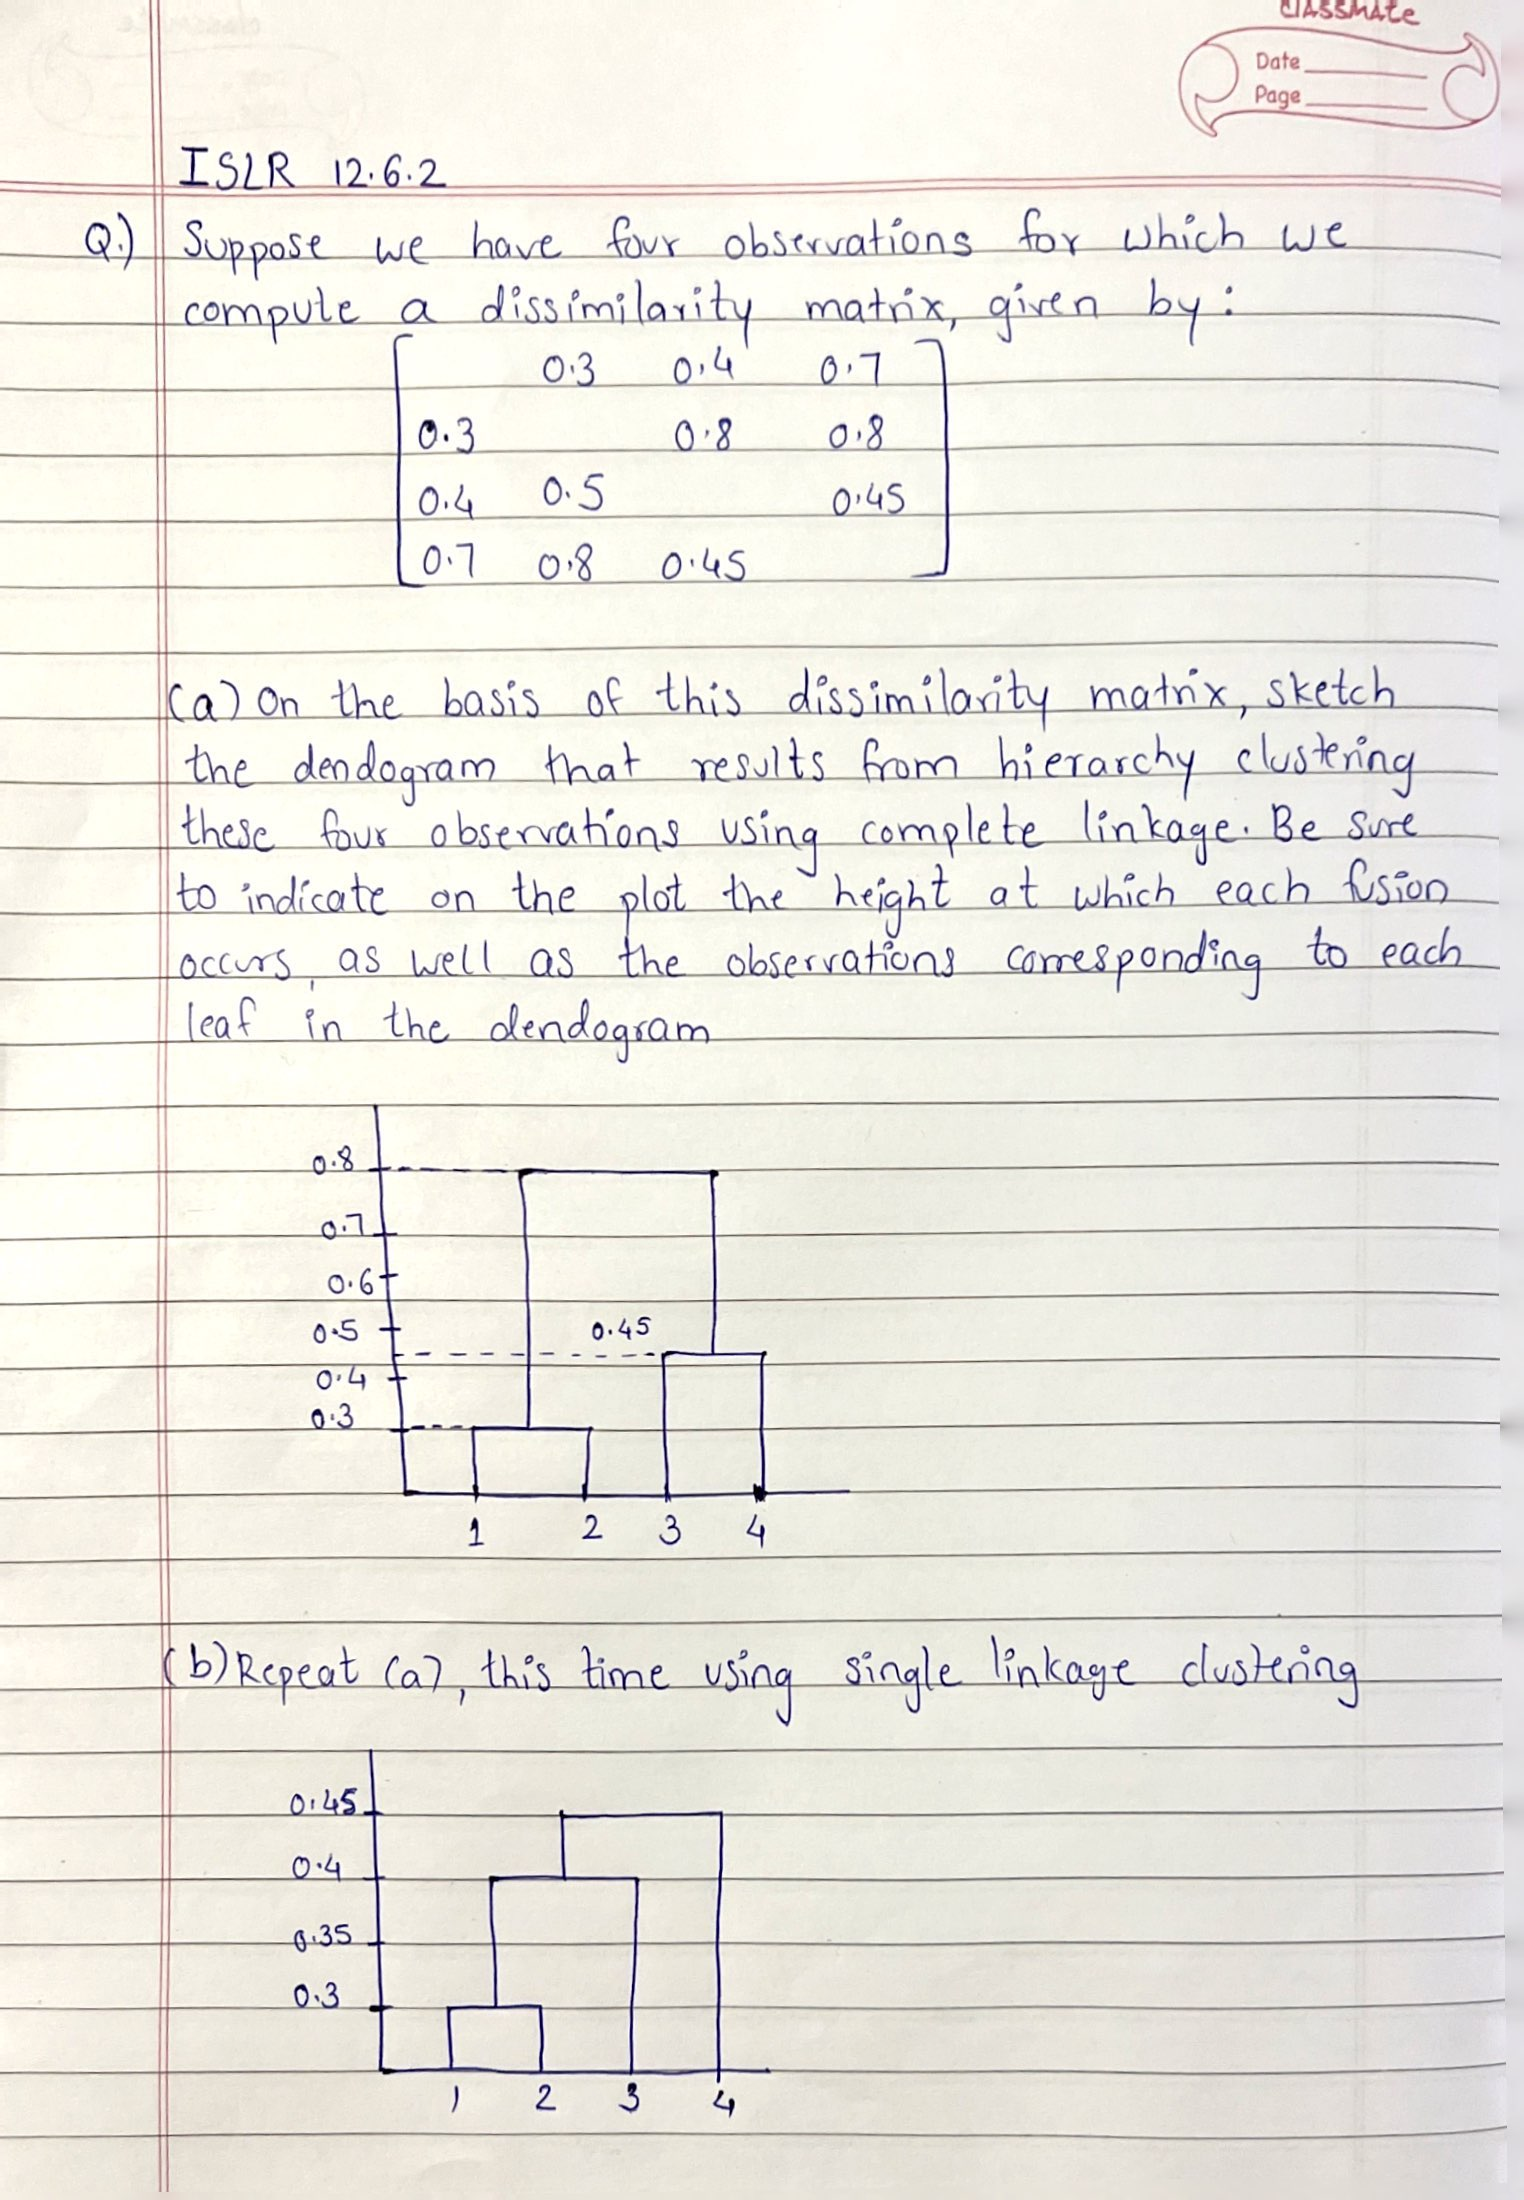

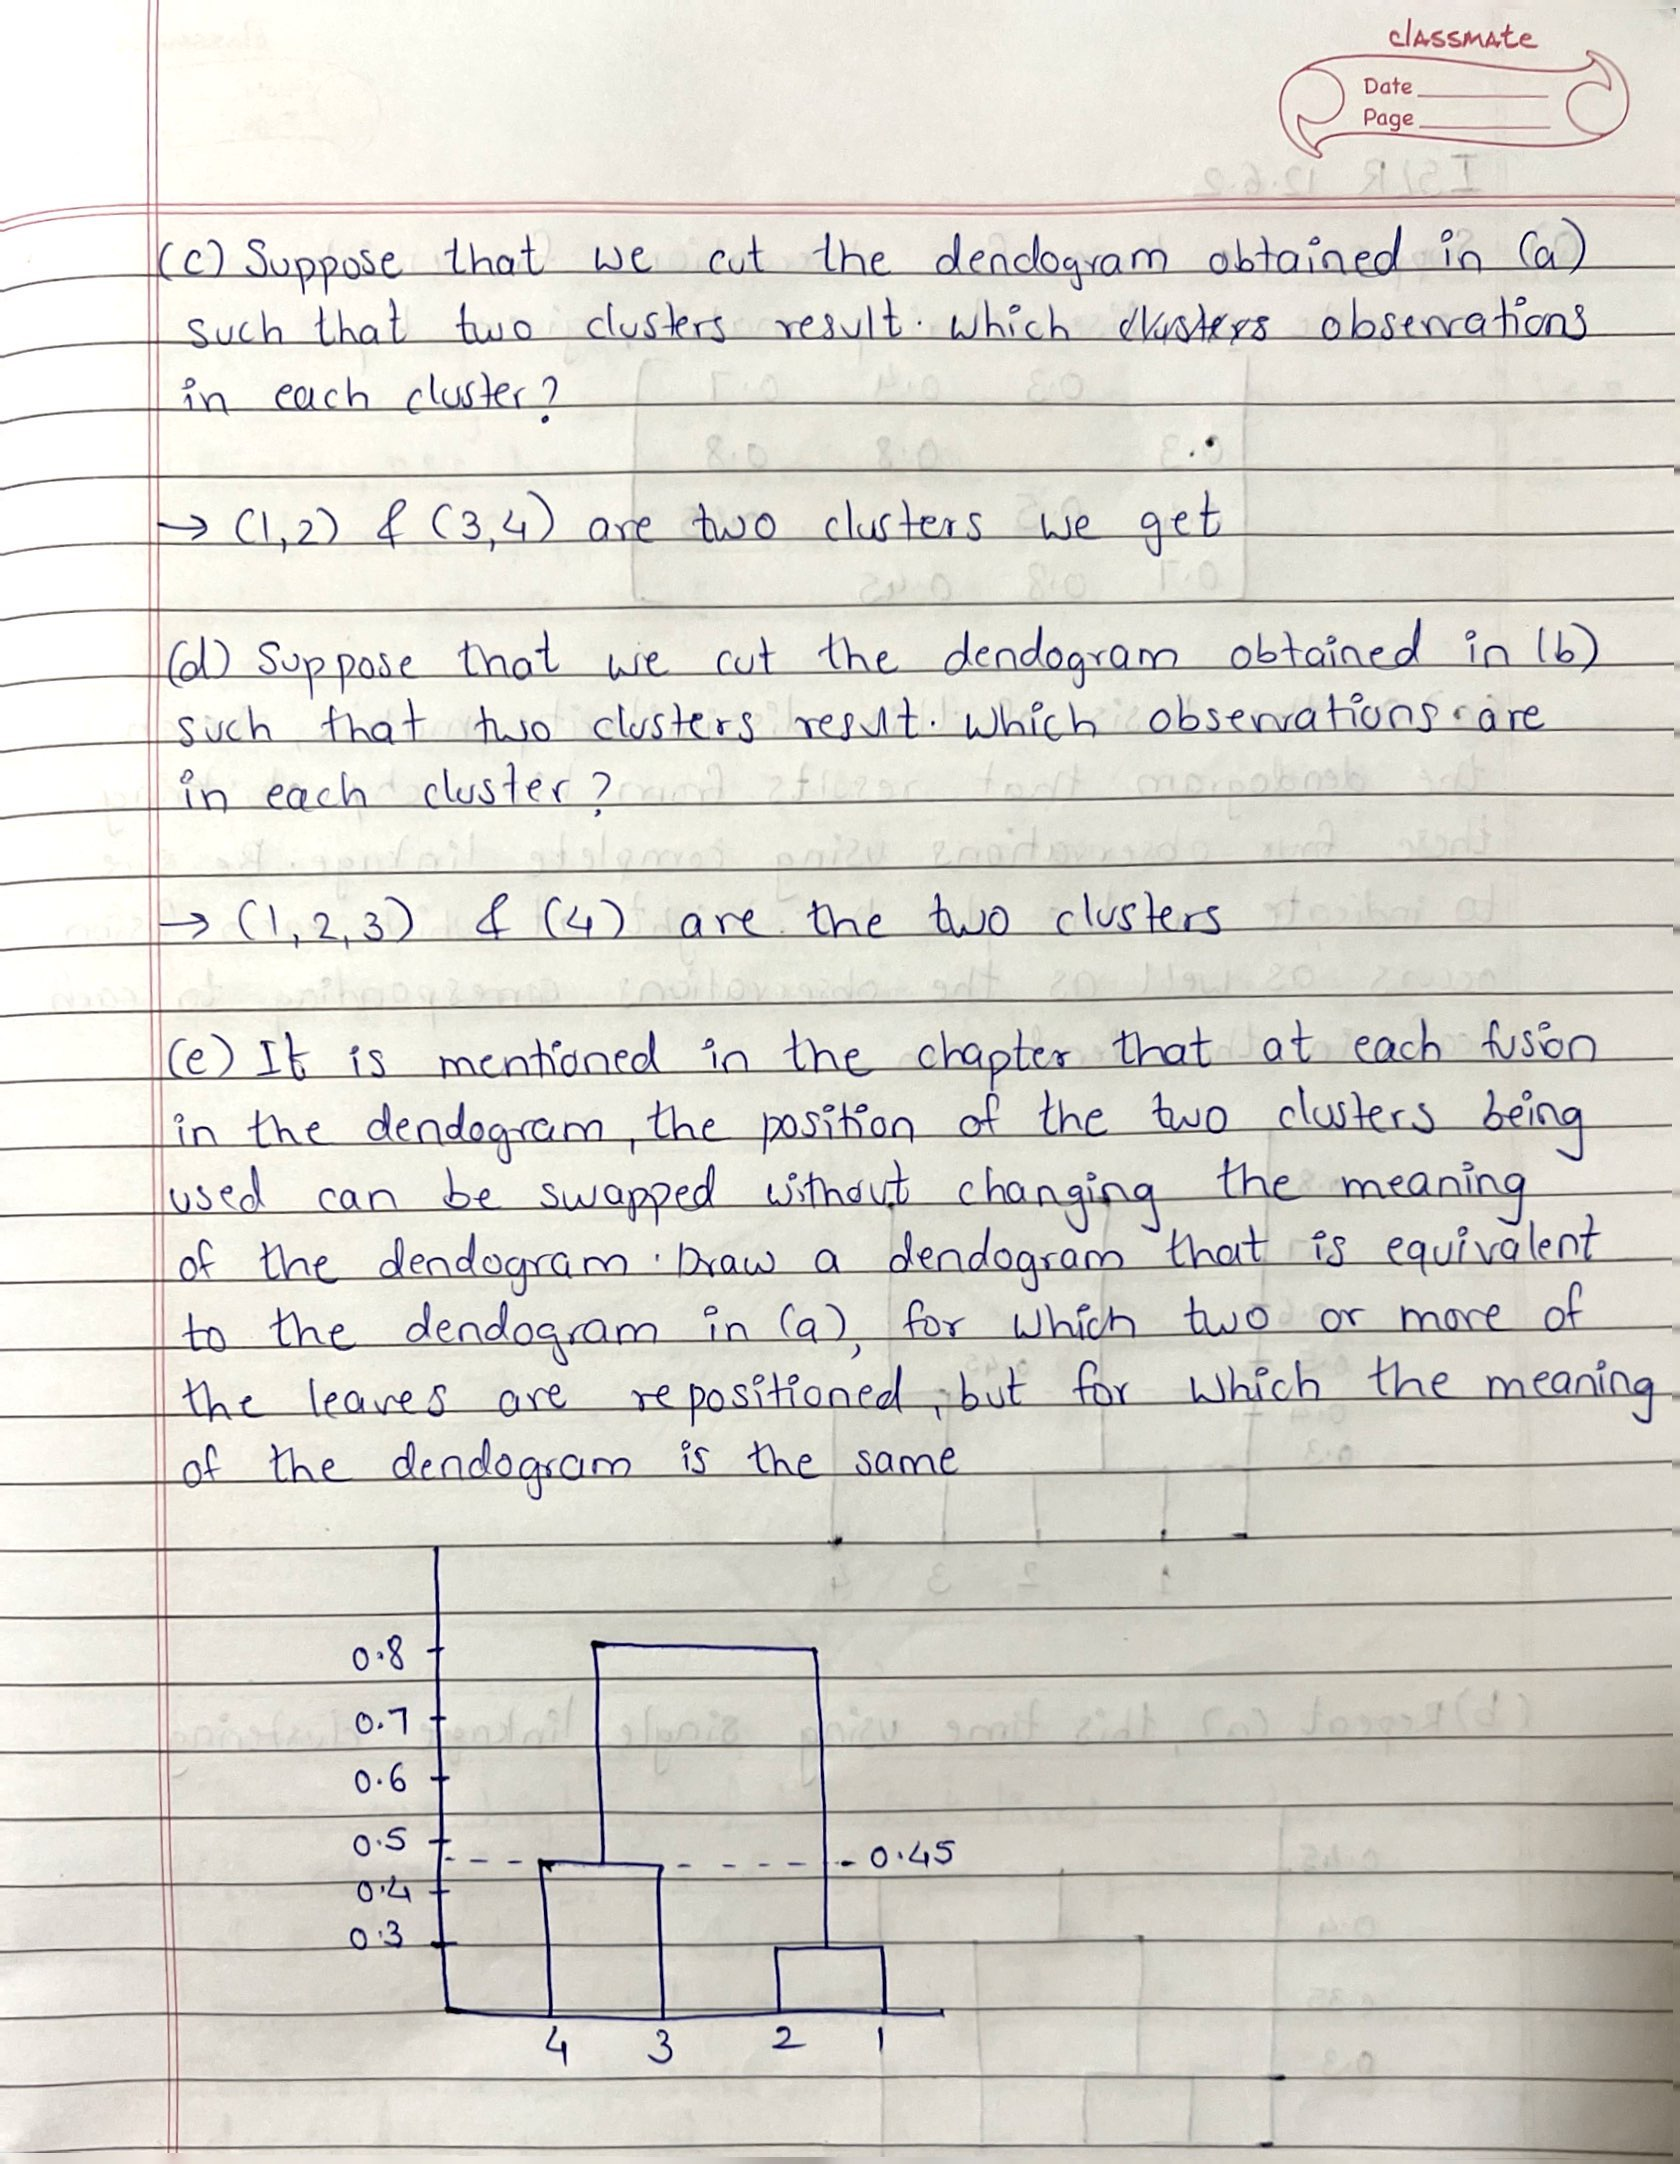

In [63]:
!pip freeze > ../requirement.txt